In [1]:
import pandas as pd
from data.constants import DEFAULT_REFLACX_LABEL_COLS, REFLACX_ALL_LABEL_COLS
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# load reflacx
df = pd.read_csv("./spreadsheets/reflacx_eye.csv")
# load negbio


In [5]:
negbio_cols = [c for c in df.columns if c.endswith("_negbio")]
chexpert_cols = [c for c in df.columns if c.endswith("_chexpert")]
reflacx_label_cols = DEFAULT_REFLACX_LABEL_COLS


# Negbio <-> REFLACX

- Edema <-> Pulmonary edema
- Enlarged Cardiomediastinum <-> Enlarged cardiac silhouette
- Consolidation <-> Consolidation
- Atelectasis <-> Atelectasis
- Pleural Other <-> Pleural abnormality


In [55]:
reflacx_to_negbio = {
    "Pulmonary edema": "Edema_negbio",
    "Enlarged cardiac silhouette": "Enlarged Cardiomediastinum_negbio",
    "Consolidation": "Consolidation_negbio",
    "Atelectasis": "Atelectasis_negbio",
    "Pleural abnormality": "Pleural Other_negbio",
}

reflacx_to_chexpert = {
    "Pulmonary edema": "Edema_chexpert",
    "Enlarged cardiac silhouette": "Enlarged Cardiomediastinum_chexpert",
    "Consolidation": "Consolidation_chexpert",
    "Atelectasis": "Atelectasis_chexpert",
    "Pleural abnormality": "Pleural Other_chexpert",
}

chexpert_to_negbio = {
    "Edema_chexpert": "Edema_negbio",
    "Enlarged Cardiomediastinum_chexpert": "Enlarged Cardiomediastinum_negbio",
    "Consolidation_chexpert": "Consolidation_negbio",
    "Atelectasis_chexpert": "Atelectasis_negbio",
    "Pleural Other_chexpert": "Pleural Other_negbio",
}


In [15]:
# first treat reflacx as groundtruth to see how many negbio matched reflacx.


In [53]:
df[reflacx_label_cols] = df[reflacx_label_cols] > 0
df[negbio_cols] = df[negbio_cols] > 0
df[chexpert_cols] = df[chexpert_cols] > 0


In [136]:
def plot_match_count_map(a_to_b, a_name, b_name, use_percentage=False):
    match_count_dict = {}
    for l in a_to_b.keys():
        match_count_dict.update(
            {
                l: {
                    "matched": 0,
                    "unmatched": 0,
                }
            }
        )

    for _, instance in df.iterrows():
        for a_lesion, b_lesion in a_to_b.items():
            if instance[a_lesion] != instance[b_lesion]:
                match_count_dict[a_lesion]["unmatched"] += 1
            else:
                match_count_dict[a_lesion]["matched"] += 1

    match_df = []

    for m in match_count_dict.keys():
        total_count = match_count_dict[m]["unmatched"] + match_count_dict[m]["matched"]
        match_df.append(
            {
                "lesion": m,
                "match_type": "matched",
                "number": match_count_dict[m]["matched"],
                "percentage": match_count_dict[m]["matched"] / total_count * 100,
            }
        )

        match_df.append(
            {
                "lesion": m,
                "match_type": "unmatched",
                "number": match_count_dict[m]["unmatched"],
                "percentage": match_count_dict[m]["unmatched"] / total_count *100,
            }
        )

    plt.figure(figsize=(12, 7))
    plt.title(f"({a_name} - {b_name}) annotations matching.")

    palette = {"matched": "yellowgreen", "unmatched": "coral"}

    g = sns.barplot(
        data=pd.DataFrame(match_df),
        x="lesion",#lesion
        y="number" if not use_percentage else "percentage",
        hue="match_type",
        palette=palette,
        errorbar=None,
    )

    for container in g.containers:
        g.bar_label(container)

    g.legend_.set_title(None)
    plt.xlabel("Lesion")
    if use_percentage:
        plt.ylabel("% of instances")
    else:
        plt.ylabel("Number")
    
    plt.plot()

    return g


In [137]:
# def plot_match_count_map(a_to_b, a_name, b_name, use_percentage=False):
#     match_count_dict = {}
#     for l in a_to_b.keys():
#         match_count_dict.update(
#             {
#                 l: {
#                     "matched": 0,
#                     "unmatched": 0,
#                 }
#             }
#         )

#     for _, instance in df.iterrows():
#         for a_lesion, b_lesion in a_to_b.items():
#             if instance[a_lesion] != instance[b_lesion]:
#                 match_count_dict[a_lesion]["unmatched"] += 1
#             else:
#                 match_count_dict[a_lesion]["matched"] += 1

#     match_df = []

#     for m in match_count_dict.keys():
#         total_count = match_count_dict[m]["unmatched"] + match_count_dict[m]["matched"]
#         match_df.append(
#             {
#                 "lesion": m,
#                 "match_type": "matched",
#                 "number": match_count_dict[m]["matched"],
#                 "percentage": match_count_dict[m]["matched"] / total_count * 100,
#             }
#         )

#         match_df.append(
#             {
#                 "lesion": m,
#                 "match_type": "unmatched",
#                 "number": match_count_dict[m]["unmatched"],
#                 "percentage": match_count_dict[m]["unmatched"] / total_count *100,
#             }
#         )

#     plt.figure(figsize=(3, 7))
#     plt.title(f"({a_name} - {b_name}) annotations matching.")

#     palette = {"matched": "yellowgreen", "unmatched": "coral"}

#     g = sns.barplot(
#         data=pd.DataFrame(match_df),
#         x="match_type",#lesion
#         y="number" if not use_percentage else "percentage",
#         # hue="match_type",
#         palette=palette,
#         errorbar=None
#     )

#     print(g.containers[0])
#     g.bar_label( g.containers[0])
#     # g.legend_.set_title(None)
#     plt.xlabel("Lesion")

#     if use_percentage:
#         plt.ylabel("% of instances")
#     else:
#         plt.ylabel("Number")
    
#     plt.plot()

#     return g


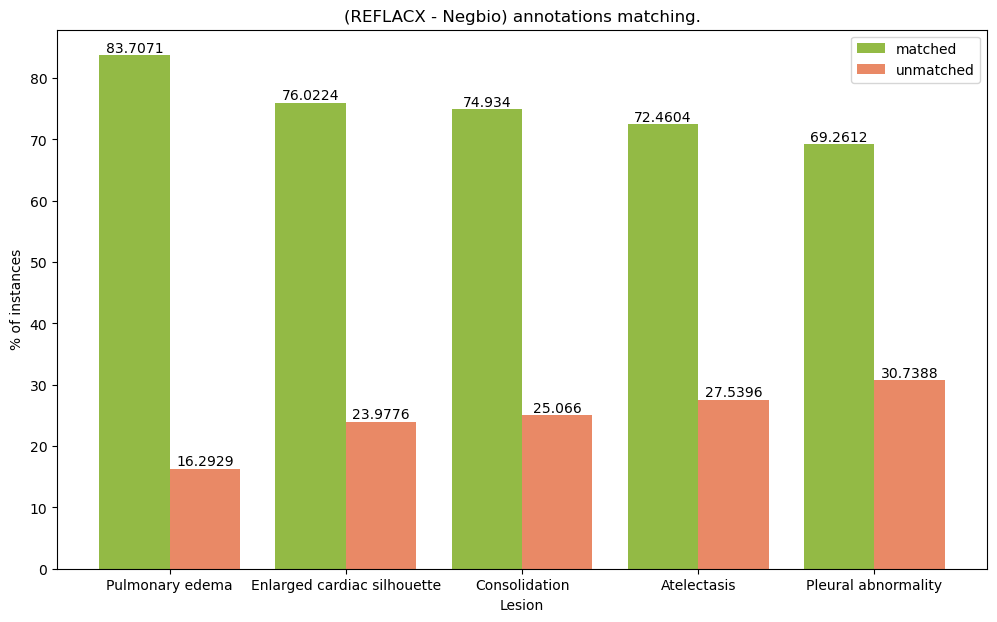

In [138]:
g = plot_match_count_map(
    reflacx_to_negbio, a_name="REFLACX", b_name="Negbio", use_percentage=True
)


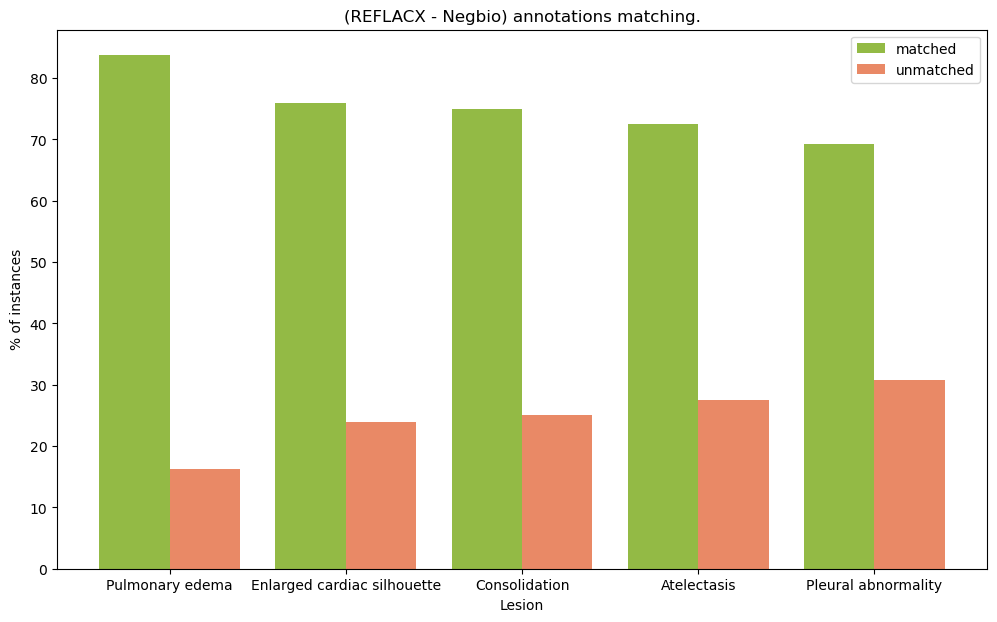

In [93]:
plot_match_count_map(reflacx_to_negbio, a_name="REFLACX", b_name="Negbio", use_percentage=True)


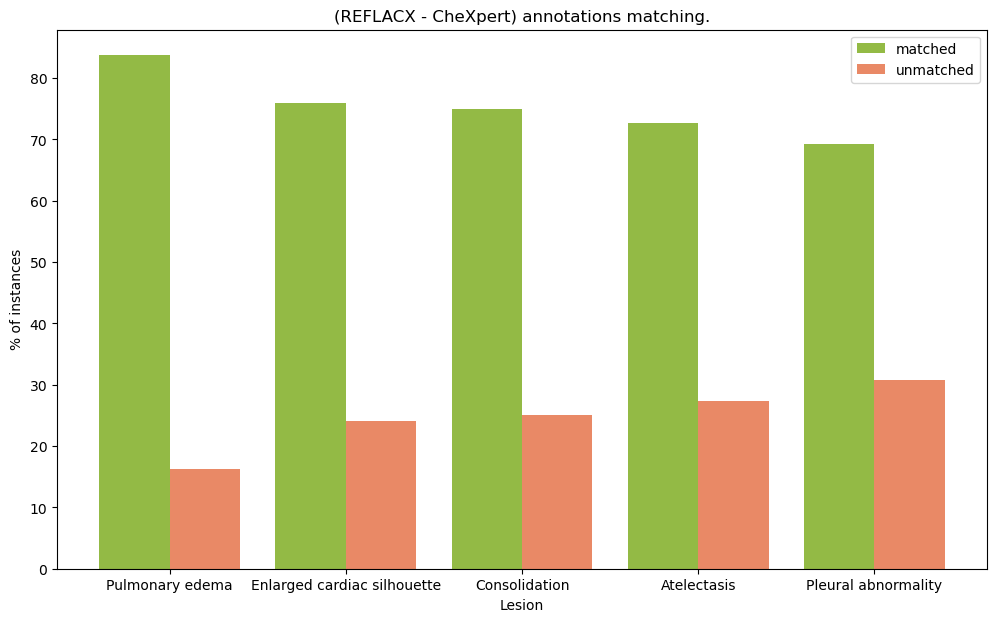

In [94]:
plot_match_count_map(reflacx_to_chexpert, a_name="REFLACX", b_name="CheXpert", use_percentage=True)


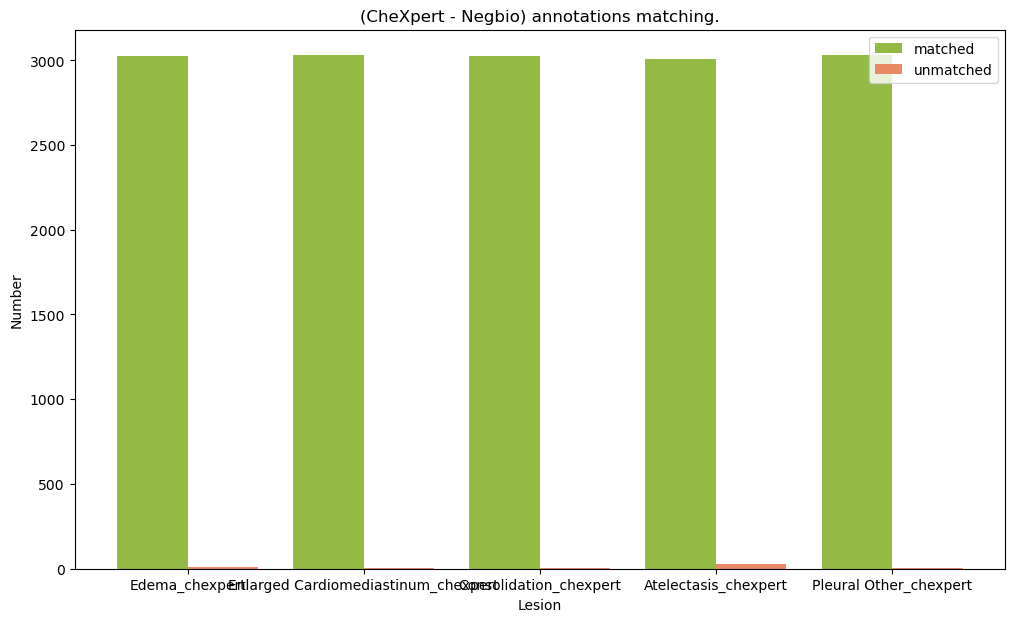

In [84]:
plot_match_count_map(chexpert_to_negbio, a_name="CheXpert", b_name="Negbio")


<Axes: xlabel='lesion', ylabel='number'>

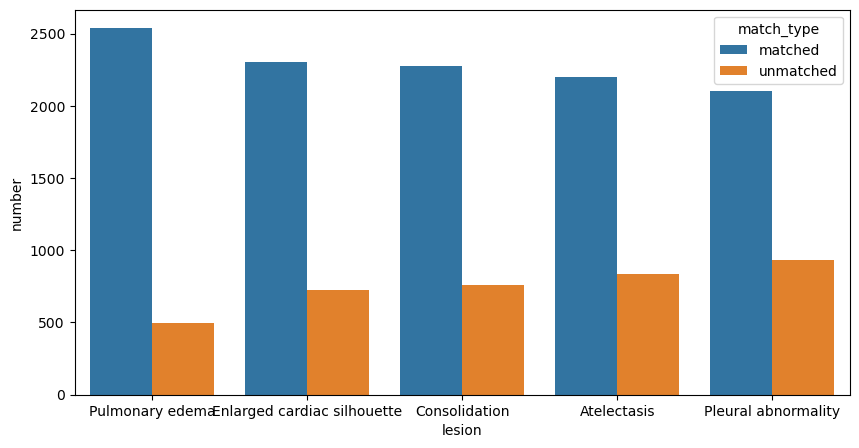